<a href="https://colab.research.google.com/github/Aayush37/major-project-AI/blob/main/major_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
from tensorflow.keras.applications.vgg16 import VGG16
import tensorflow.keras as keras
from keras.layers import Input,Flatten,Dense
from keras.models import Model
from tensorflow.keras.applications.vgg16 import preprocess_input

In [18]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

In [19]:
data=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
data=ImageDataGenerator(rescale=1./255)
im_data=data.flow_from_directory('/content/drive/MyDrive/Training/AI/train',target_size=(224,224),batch_size=32,class_mode='categorical')

Found 74 images belonging to 5 classes.


data=[]
images=[]
target=[]
path='/content/drive/MyDrive/Training/AI/data'
classification_type=os.listdir(path)
for i in range(len(classification_type)):
  img_path=os.listdir(os.path.join(path,classification_type[i]))
  for j in img_path:
    img=plt.imread(os.path.join(os.path.join(path,classification_type[i]),j))
    img_resize=resize(img,(224,224,3))
    data.append(img_resize)
    images.append(img_resize)
    target.append(i)
data=np.array(data)
images=np.array(images)
target=np.array(target)


In [20]:
model=VGG16(
    include_top=False, weights='imagenet', input_shape=(224,224,3))

In [21]:
for layer in model.layers:
  layer.trainable=False

In [22]:
x=Flatten()(model.output)
pred=Dense(5,activation='softmax')(x)

In [23]:
model=Model(inputs=model.input, outputs=pred)#rebuilding the model

In [24]:
model.compile(optimizer="Adam", loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])


In [25]:
model.fit_generator(im_data,epochs=50)

Epoch 1/50
3/3 [==============================] - 5s 2s/step - loss: 2.3213 - accuracy: 0.2027
Epoch 2/50
3/3 [==============================] - 0s 60ms/step - loss: 0.7765 - accuracy: 0.6757
Epoch 3/50
3/3 [==============================] - 0s 60ms/step - loss: 0.4300 - accuracy: 0.8649
Epoch 4/50
3/3 [==============================] - 0s 59ms/step - loss: 0.1097 - accuracy: 0.9865
Epoch 5/50
3/3 [==============================] - 0s 59ms/step - loss: 0.0807 - accuracy: 0.9865
Epoch 6/50
3/3 [==============================] - 0s 59ms/step - loss: 0.0652 - accuracy: 0.9865
Epoch 7/50
3/3 [==============================] - 0s 93ms/step - loss: 0.0227 - accuracy: 1.0000
Epoch 8/50
3/3 [==============================] - 0s 68ms/step - loss: 0.0107 - accuracy: 1.0000
Epoch 9/50
3/3 [==============================] - 0s 70ms/step - loss: 0.0073 - accuracy: 1.0000
Epoch 10/50
3/3 [==============================] - 0s 69ms/step - loss: 0.0051 - accuracy: 1.0000
Epoch 11/50
3/3 [==============

In [26]:
model.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [30]:
def decode(a):
  if (a[0][0]==1):
    return('Lamborghini')
  elif (a[0][1]==1):
    return('aston martin')
  elif (a[0][2]==1):
    return('bugatti')
  elif (a[0][3]==1):
    return('ferari')
  elif (a[0][4]==1):
    return('mercedes')
  else:
    return('wrong')

[[1. 0. 0. 0. 0.]]
[[1. 0. 0. 0. 0.]]
[[1. 0. 0. 0. 0.]]
[[1. 0. 0. 0. 0.]]
[[1.0000000e+00 0.0000000e+00 0.0000000e+00 5.5726435e-21 0.0000000e+00]]
[[0. 0. 0. 1. 0.]]
[[0. 0. 0. 1. 0.]]
[[0. 0. 0. 1. 0.]]
[[3.1999332e-09 0.0000000e+00 1.1206283e-02 9.8879367e-01 2.2341465e-14]]
[[0. 0. 0. 1. 0.]]
[[0. 1. 0. 0. 0.]]
[[6.5445596e-01 3.4526369e-01 7.1035259e-08 2.8022728e-04 4.6279199e-15]]
[[0.000000e+00 1.000000e+00 8.418662e-38 0.000000e+00 0.000000e+00]]
[[7.6784232e-22 1.0000000e+00 8.7470687e-33 4.5886494e-31 1.7274382e-28]]
[[0. 1. 0. 0. 0.]]
[[3.6734328e-26 4.8009657e-30 1.0000000e+00 8.4349648e-37 0.0000000e+00]]
[[0. 0. 1. 0. 0.]]
[[1.4730364e-29 0.0000000e+00 8.0551329e-11 0.0000000e+00 1.0000000e+00]]
[[0. 0. 1. 0. 0.]]
[[8.6917592e-32 0.0000000e+00 1.0000000e+00 0.0000000e+00 5.7676776e-23]]
[[6.330889e-36 0.000000e+00 0.000000e+00 0.000000e+00 1.000000e+00]]
[[1.3273282e-24 0.0000000e+00 0.0000000e+00 0.0000000e+00 1.0000000e+00]]
[[0. 0. 0. 0. 1.]]
[[0. 0. 0. 0. 1.]]
[[0.

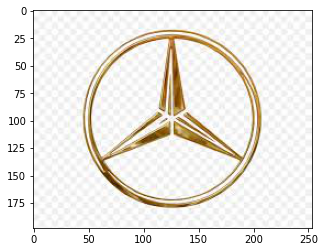

In [31]:
import matplotlib.pyplot as plt
from skimage.io import imread
import os

images = []
target = []
y_pred = []
data = '/content/drive/MyDrive/Training/AI'
categories = ['test']

for category in categories:
    class_num = categories.index(category)
    path = os.path.join(data, category)
    
    for cat in os.listdir(path):
        cat1 = os.path.join(path, cat)
        for img in os.listdir(cat1):
            img_array = imread(os.path.join(cat1, img))
            images.append(img_array)
            target.append(cat)
            x = image.load_img(os.path.join(cat1, img),target_size=(224,224))
            x = image.img_to_array(x)
            x = np.expand_dims(x,axis=0)
            x = preprocess_input(x)
            y = model.predict(x)
            de_y=decode(y)
            y_pred.append(de_y)
            print(y)

images = np.array(images)
target = np.array(target)
y_pred=np.array(y_pred)
plt.imshow(img_array)

In [32]:
y_pred

array(['Lamborghini', 'Lamborghini', 'Lamborghini', 'Lamborghini',
       'Lamborghini', 'ferari', 'ferari', 'ferari', 'wrong', 'ferari',
       'aston martin', 'wrong', 'aston martin', 'aston martin',
       'aston martin', 'bugatti', 'bugatti', 'mercedes', 'bugatti',
       'bugatti', 'mercedes', 'mercedes', 'mercedes', 'mercedes',
       'mercedes'], dtype='<U12')

In [33]:
target

array(['Lamborghini', 'Lamborghini', 'Lamborghini', 'Lamborghini',
       'Lamborghini', 'ferari', 'ferari', 'ferari', 'ferari', 'ferari',
       'aston martin', 'aston martin', 'aston martin', 'aston martin',
       'aston martin', 'bugatti', 'bugatti', 'bugatti', 'bugatti',
       'bugatti', 'mercedes', 'mercedes', 'mercedes', 'mercedes',
       'mercedes'], dtype='<U12')

In [37]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix,classification_report
print("Accuracy : ", metrics.accuracy_score(target,y_pred))
confusion_matrix(target,y_pred)


Accuracy :  0.88


array([[5, 0, 0, 0, 0, 0],
       [0, 4, 0, 0, 0, 1],
       [0, 0, 4, 0, 1, 0],
       [0, 0, 0, 4, 0, 1],
       [0, 0, 0, 0, 5, 0],
       [0, 0, 0, 0, 0, 0]])

In [39]:
print(classification_report(target,y_pred))

              precision    recall  f1-score   support

 Lamborghini       1.00      1.00      1.00         5
aston martin       1.00      0.80      0.89         5
     bugatti       1.00      0.80      0.89         5
      ferari       1.00      0.80      0.89         5
    mercedes       0.83      1.00      0.91         5
       wrong       0.00      0.00      0.00         0

    accuracy                           0.88        25
   macro avg       0.81      0.73      0.76        25
weighted avg       0.97      0.88      0.92        25



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [41]:
model.save('mo.h5')

In [47]:

!pip install pyngrok==4.1.1
!pip install streamlit


     |████████████████████████████████| 7.4MB 8.4MB/s 
     |████████████████████████████████| 102kB 13.9MB/s 
     |████████████████████████████████| 112kB 54.5MB/s 
     |████████████████████████████████| 4.5MB 50.5MB/s 
     |████████████████████████████████| 163kB 52.2MB/s 
     |████████████████████████████████| 122kB 57.1MB/s 
     |████████████████████████████████| 71kB 11.6MB/s 
  Created wheel for watchdog: filename=watchdog-1.0.1-cp36-none-any.whl size=72206 sha256=f34a4a462947dd5eed7e9b299a1f1d0d6dd098945bdf1b7b1261788e02bd3b80
  Stored in directory: /root/.cache/pip/wheels/d8/ce/d8/31a48288b5728794feda5ac479fa324cc1cde4398c29eff064
  Created wheel for blinker: filename=blinker-1.4-cp36-none-any.whl size=13450 sha256=f088b32580e8eece0b75c7bb741b9182dcf93b169e0fff5b28721c421b477316
  Stored in directory: /root/.cache/pip/wheels/92/a0/00/8690a57883956a301d91cf4ec999cc0b258b01e3f548f86e89
Successfully built watchdog blinker
ERROR: google-colab 1.0.0 has requirement ipykernel~=4

In [68]:
!pip install CV2

ERROR: Could not find a version that satisfies the requirement CV2 (from versions: none)
ERROR: No matching distribution found for CV2


In [73]:
%%writefile app1.py
import streamlit as st
import tensorflow as tf
import numpy as np
from PIL import Image
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image

m_new = tf.keras.models.load_model('mo.h5')

def decode(a):
  if (a[0][0]==1):
    return('Lamborghini')
  elif (a[0][1]==1):
    return('aston martin')
  elif (a[0][2]==1):
    return('bugatti')
  elif (a[0][3]==1):
    return('ferari')
  elif (a[0][4]==1):
    return('mercedes')
  else:
    return('invalid')

st.title('logo')
st.write('Using Transfer learning')
# a = st.text_input("Write your Name","---")
# st.write("My name is ",a)
upload = st.file_uploader("Choose an Image")
if upload is not None:
  img = Image.open(upload)
  st.image(img,caption = 'UPLOADED IMAGE',use_column_width=True)

  if st.button('PREDICT'):
    st.write("RESULT....")
    x = image.img_to_array(img)
    x = np.expand_dims(x,axis=0)
    x = preprocess_input(x)
    extract = m_new.predict(x)
    st.write(str(decode(extract)))


Overwriting app1.py


In [45]:
!pip install pyngrok==4.1.1


  Created wheel for pyngrok: filename=pyngrok-4.1.1-cp36-none-any.whl size=15970 sha256=f05196bc629777c3064e78ca92c163d3a27c73cf02c844046a2e9ecd2b6c70ec
  Stored in directory: /root/.cache/pip/wheels/97/71/0d/1695f7c8815c0beb3b5d9b35d6eec9243c87e6070fbe3977fa
Successfully built pyngrok


In [74]:
from pyngrok import ngrok
url = ngrok.connect(port='8501')
url


'http://0591448e795b.ngrok.io'

In [75]:
!streamlit run app1.py &


2020-12-13 13:51:09.619931: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1

  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.2:8501
  External URL: http://34.82.128.145:8501

2020-12-13 13:51:10.855250: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcuda.so.1
2020-12-13 13:51:10.860328: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:982] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-12-13 13:51:10.860878: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1716] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla T4 computeCapability: 7.5
coreClock: 1.59GHz coreCount: 40 deviceMemorySize: 14.73GiB deviceMemoryBandwidth: 298.08GiB/s
2020-12-13 13:51:10.860948: I tensorflow/stream_executor/platform/default/dso_loa